## Data lab 1 - financial concepts

#### Note 1: Review what you have learned in DataCamp assignments (e.g., Introduction to Financial Concepts in Python).
#### Note 2: The financial functions (i.e., npv, pv, fv, rate, pmt, nper) in numpy have migrated to the package numpy_financial (npf). So, to call a financial function, use npf., instead of np. 
#### Note 3: To deep dive into what each function does, use the help function, e.g., run "help(npf.npv)."
 

### Question 1 - Choosing between projects with different lifespans.
### You are considering two projects with different lifespans. Project 1 (Project 2) has a life span of 8 years (6 years). The expected cash flows for both projects are below. The cost of equity (debt) capital is 15% (5%). The debt equity ratio is 1/3. The tax rate is 20%.

### Time       [0   ,1   ,2   ,3   ,4   ,5   ,6   ,7   ,8   ]
### Project 1  [-800, 200, 500, 100, 300, 400, 200, 300, 700]
### Project 2  [-800, 100, 100, 100, 200, 300, 2000]

1 (a) How do you evaluate projects with different lifespans? Which project will you choose? <br><br>
Hint: Calculate the NPVs for both projects and then calculate and compare the Equivalent Annual Anuity (EAA) of the NPVs for both projects (i.e., calculate the PMT of the NPV).

In [1]:
########################### Qiaozheng LU ###########################
####################### Individual Data Lab ########################

import numpy as np
import numpy_financial as npf

# Initialize the components of the weighted average cost of capital
D = 0.05      # cost of debt
E = 0.15      # cost of equity
DE = 1/3      # debt to equity ratio
t = 0.2      # corporate tax rate

Project1 = [-800, 200, 500, 100, 300, 400, 200, 300, 700]     # Create a numpy array of cash flows for Project 1
Project2 = [-800, 100, 100, 100, 200, 300, 2000]     # Create a numpy array of cash flows for Project 2

wacc =  1/(1+DE) * E + DE/(1+DE) * (1-t) * D    # Calculate the weighted average cost of capital

npv1 = npf.npv(wacc, Project1)     # Calculate the Net Present Value (NPV) for Project
npv2 = npf.npv(wacc, Project2)     # Calculate the NPV for Project

eaa1 = -npf.pmt(wacc, nper=len(Project1)-1, pv=npv1)     # Calculate the Equivalent Annual Anuity (EAA) for Project 1
eaa2 = -npf.pmt(wacc, nper=len(Project2)-1, pv=npv2)     # Calculate the Equivalent Annual Anuity (EAA) for Project 2

# Output
print('NPV for Project 1 = ' + str(round(npv1, 2)))
print('NPV for Project 2 = ' + str(round(npv2, 2)))

print('EAA for Project 1 = ' + str(round(eaa1, 2)))
print('EAA for Project 2 = ' + str(round(eaa2, 2)))

NPV for Project 1 = 770.42
NPV for Project 2 = 733.27
EAA for Project 1 = 156.44
EAA for Project 2 = 179.61


1 (b) Write a function to automate the comparison between two projects with unequal lives, but the same WACC.

In [2]:
# function to compare the NPVs of two projects given traditional cash flows (i.e., outflow at time 0, then inflows from time 1)
def compare_npv(cf1, cf2, wacc):
    
    ''' 
    INPUTS
    cf1: numpy array of cash flows for project 1. Traditional cash flows (i.e., outflow at time 0, then inflows from time 1)
    cf2: numpy array of cash flows for project 2. Traditional cash flows (i.e., outflow at time 0, then inflows from time 1)
    wacc: weighted average cost of capital 
    
    OUTPUTS
    print the optimal capital budgeting decisions
    
    '''
    npv1 = npf.npv(wacc, cf1)     # Calculate the Net Present Value (NPV) for Project 1
    npv2 = npf.npv(wacc, cf2)     # Calculate the NPV for Project 2

    eaa1 = -npf.pmt(wacc, nper=len(cf1)-1, pv=npv1)     # Calculate the Equivalent Annual Anuity (EAA) for Project 1
    eaa2 = -npf.pmt(wacc, nper=len(cf2)-1, pv=npv2)     # Calculate the Equivalent Annual Anuity (EAA) for Project 2
  
# Compare the NPVs of two projects
    if npv1 > npv2:
        print('Project 1 is better')
    elif npv1 < npv2:
        print('Project 2 is better')
    else:
        print('Two projects have identical npv')

    #Output
    print('EAA for Project 1 = ' + str(round(eaa1, 2)))
    print('EAA for Project 2 = ' + str(round(eaa2, 2)))


1 (c) Use the function to test whether the project choice varies with WACC. <br>
Hint: Vary the WACC and see whether the project choice changes. 

In [3]:
# Call the function
compare_npv(Project1, Project2, wacc)
print('')
# Vary the input WACC +/- 5% and 10% around the current level
range = [wacc-0.05, wacc+0.05, wacc-0.1, wacc+0.1, wacc]

for i in range:
    print('for wacc of ' + str(round(i, 2)))
    compare_npv(Project1, Project2, i)
    print('')

Project 1 is better
EAA for Project 1 = 156.44
EAA for Project 2 = 179.61

for wacc of 0.07
Project 2 is better
EAA for Project 1 = 190.39
EAA for Project 2 = 240.59

for wacc of 0.17
Project 1 is better
EAA for Project 1 = 121.46
EAA for Project 2 = 120.87

for wacc of 0.02
Project 2 is better
EAA for Project 1 = 223.16
EAA for Project 2 = 303.97

for wacc of 0.22
Project 1 is better
EAA for Project 1 = 85.56
EAA for Project 2 = 64.17

for wacc of 0.12
Project 1 is better
EAA for Project 1 = 156.44
EAA for Project 2 = 179.61



### Question 2 - Loan Amortization

### Your dream house is an SGD 1,000,000 2-bedder private condominium at West Coast Vale. You have saved enough to pay 30% down. You plan to fund the remaining with a 30-year fixed-rate mortgage loan at 3% per annum. You pay for the mortgage every month (i.e., a fixed amount throughout the life of the mortgage). You are curious about how the mortgage principal and interest components change over time.

2 (a) Calculate and plot and the loan amortization schedule.

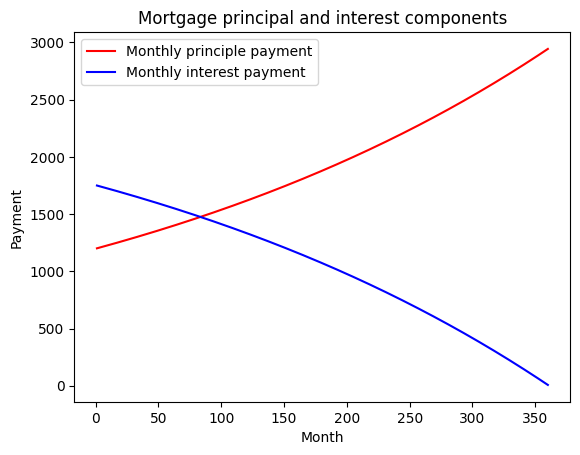

In [4]:
import matplotlib.pyplot as plt

price = 1000000      # house price
dpp = 0.3      # down payment percentage
dp = price * dpp      # down payment amount
loan = price - dp      # loan amount
tenure = 30      # loan tenure in years
apr = 0.03      # annual percentage rate
mr = apr/12      # monthly rate
tenure = tenure * 12      # tenure in months

monthpay = -npf.pmt(mr, tenure, loan)     # How much is the monthly mortgage payment?

# Initial empty arrays
monthprinciple = []
monthinterest = []
monthprinciplepay = []

principle = loan      # Original value of principle is the loan amount

for i in np.arange(0, tenure, 1):
    interest = principle * mr      # the amount of interest equals the principle left multiplied by the monthly rate
    principlepay = monthpay - interest      # principle payment each month equals the monthly payment less the interest payment

    # appending everything into the arrays
    monthprinciple.append(principle)
    monthprinciplepay.append(principlepay)
    monthinterest.append(interest)

    # the principle left is iterated
    principle = principle - principlepay

# initiate the month array
month = []
for i in np.arange(1, 30*12+1, 1):
    month.append(i)

# plot
plt.plot(month, monthprinciplepay, color='red', label = "Monthly principle payment")
plt.plot(month, monthinterest, color='blue', label = "Monthly interest payment")
plt.legend()
# title and labels
plt.title('Mortgage principal and interest components')
plt.xlabel('Month')
plt.ylabel('Payment')
plt.show()

2 (b) You are comparing the different mortgage loans in the market. To save yourself time, write a function to automate loan amortization schedule of any fixed-rate mortgages given home value, down payment percentage, mortgage rate, and mortgage tenure.

In [5]:
# function to compare the NPVs of two projects given traditional cash flows
def loan_amortization(home_value, down_payment_percent, mortgage_rate, mortgage_tenure_year, chart_title):

    ''' 
    INPUTS
    home_value: value of the home you are looking to buy
    down_payment_percent: the percentage you are paying up-front
    mortgage_tenure_year: the tenure of the mortgage loan (in years)
    mortgage_rate: bank quoted rate (Annual Percentage Rate) for the fixed-rate mortage loan for the specific mortgage tenure
    chart_title: chart title to add

    OUTPUTS
    A plot of interest and principal components for each monthly mortgage payment
    
    '''

    downpay = home_value * down_payment_percent      # Calculate the dollar value of the down payment

    mortgage = home_value - downpay      # Calculate the value of the mortgage loan required

    mr = mortgage_rate/12      # Calculate the equivalent monthly mortgage rate from the annual percentage rate

    tenure = mortgage_tenure_year * 12      # Calculate monthly payment periods during the mortgage tenure (in years)?

    pmt = -npf.pmt(mr, tenure, mortgage)      # Calculate the monthly mortgage payment

    # Initial empty arrays
    monthprinciple = []
    monthinterest = []
    monthprinciplepay = []

    principle = mortgage # Original value of principle is the loan amount

    for i in np.arange(0, tenure, 1):
        interest = principle * mr # the amount of interest equals the principle left multiplied by the monthly rate
        principlepay = pmt - interest # principle payment each month equals the monthly payment less the interest payment

        # appending everything into the arrays
        monthprinciple.append(principle)
        monthprinciplepay.append(principlepay)
        monthinterest.append(interest)

        # the principle left is iterated
        principle = principle - principlepay

    # initiate the month array
    month = []
    for i in np.arange(1, tenure+1, 1):
        month.append(i)

    # plot
    plt.plot(month, monthprinciplepay, label = "Monthly principle payment", color='red')
    plt.plot(month, monthinterest, label = "Monthly interest payment", color='blue')
    plt.legend()
    # title and labels
    plt.title('Mortgage principal and interest components' + chart_title)
    plt.xlabel('Month')
    plt.ylabel('Payment')

    plt.show()

2 (c) You do not like the idea of having to pay more mortgage interest than its principal. Use the function to explore situations in which the principal component (of each monthly mortgage payment) is strictly higher than the interest component. <br><br>
Hint: Vary the inputs of the function and observe the plots.

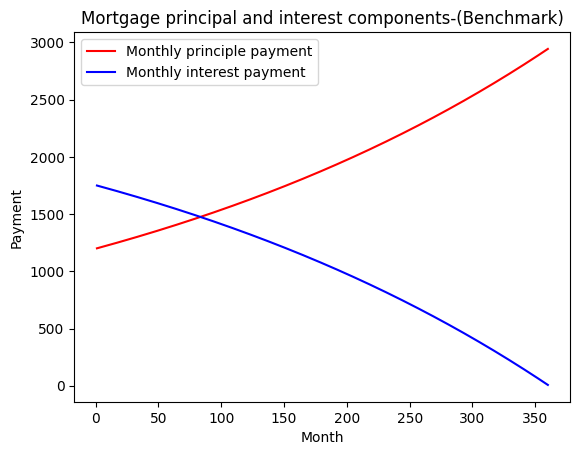

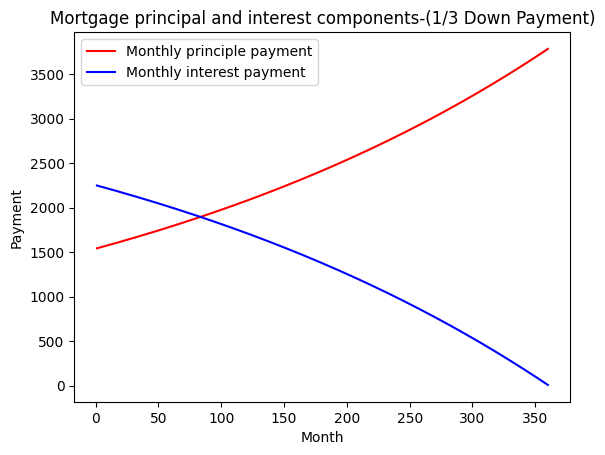

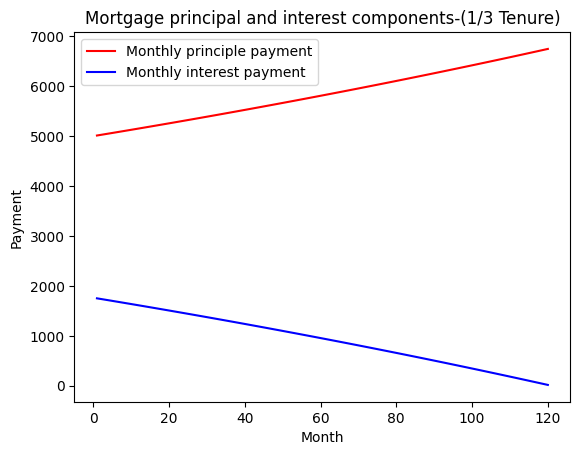

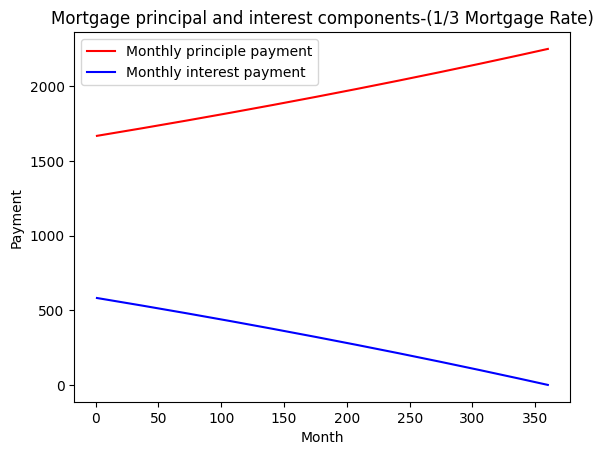

In [6]:
homevalue = 1000000
down_payment_percent = 0.3
mortgage_rate = 0.03
mortgage_tenure_year = 30

loan_amortization(homevalue, down_payment_percent, mortgage_rate, mortgage_tenure_year, '-(Benchmark)')      #Benchmark

# increase the down_payment by 1/3

loan_amortization(homevalue, down_payment_percent/3, mortgage_rate, mortgage_tenure_year, '-(1/3 Down Payment)')

# cut mortgage tenure by 1/3

loan_amortization(homevalue, down_payment_percent, mortgage_rate, mortgage_tenure_year/3, '-(1/3 Tenure)')

# lower mortgage rate by 1/3

loan_amortization(homevalue, down_payment_percent, mortgage_rate/3, mortgage_tenure_year, '-(1/3 Mortgage Rate)')


### Question 3 - Negative House Equity?

### After you bought the house in Question 2, you now realize that you bought it at a bad time (i.e., housing market peak). You are expecting the price of the house to fall at the rate of 0.48% monthly over the mortgage period. As lenders in Singapore would demand full repayment when a house experiences negative equity (i.e., mortgage value is greater than the house value), you want to find out whether and when (if it does) the house will experience negative equity. 

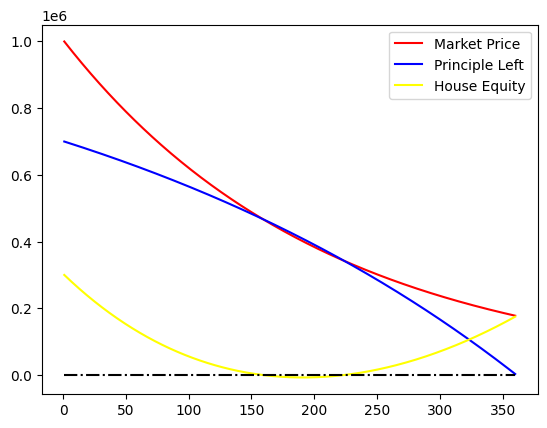

In [7]:
mkt_price = []
original_price = 1000000

# Price of the house given the declining rate
for i in np.arange(0, 30*12, 1):
    price = original_price * ((1-0.0048)**i)
    mkt_price.append(price)

price = 1000000      #House price
dpp = 0.3      #Down payment percentage
dp = price * dpp      #Down payment amount
loan = price - dp      #Loan amount
tenure = 30      #Loan tenure
apr = 0.03      #Annual percentage rate
mr = apr/12      #Monthly rate
tenure = tenure * 12      #Tenure in months

monthpay = -npf.pmt(mr, tenure, loan)      # How much is the monthly mortgage payment?

# Initial empty arrays
monthprinciple = []
monthinterest = []
monthprinciplepay = []

principle = loan # Original value of principle is the loan amount

for i in np.arange(0, tenure, 1):
    interest = principle * mr # the amount of interest equals the principle left multiplied by the monthly rate
    principlepay = monthpay - interest # principle payment each month equals the monthly payment less the interest payment

    # appending everything into the arrays
    monthprinciple.append(principle)
    monthprinciplepay.append(principlepay)
    monthinterest.append(interest)

    # the principle left is iterated
    principle = principle - principlepay

# initiate the month array
month = []
for i in np.arange(1, 30*12+1, 1):
    month.append(i)

# set up a baseline array at 0 to better see the segments where the equity is below zero
baseline = []
for i in np.arange(1, 30*12+1, 1):
    k = 0
    baseline.append(k)

house_equity = np.array(mkt_price) - np.array(monthprinciple)      # Calculate the equity

plt.plot(month, mkt_price, label='Market Price', color='red')      # market price line
plt.plot(month, monthprinciple, label='Principle Left', color='blue')      # principle left line
plt.plot(month, house_equity, label='House Equity', color='yellow')      # equity line
plt.plot(month, baseline, color='black', linestyle='-.')      # baseline

plt.legend()
plt.show()

In [8]:
# Show the months the house equity turns negative
# Hint: use np.where()
where = np.where(house_equity < 0)[0].tolist()

start_yr = int(where[0]/12)      # starting year
start_mo = where[0] % 12      # starting month

end_yr = int(where[-1]/12)      # ending year
end_mo = where[-1] % 12      # ending month

print('Starting from year ' + str(start_yr) + ' month ' + str(start_mo) + ' to year ' + str(end_yr) + ' month ' +str(end_mo) + ', the equity is negative')

Starting from year 13 month 2 to year 18 month 7, the equity is negative
